In [2]:
import os
import numpy as np
from numpy import fliplr, flipud
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image, ImageOps
from skimage import io, filters
from skimage.transform import resize, rescale, rotate
global path
from skimage.io import imread, imshow
from skimage.color import rgb2gray
import random


import glob
filelist=glob.glob('/home/aishakhan/ImageProcessing/brain_tumor_dataset/*.png') 


def loadimages(filelist):
    X_data = []
    #files = glob.glob(path)
    for myFile in filelist:
        image = io.imread(myFile)
        X_data.append(image)
    return X_data



/home/aishakhan/anaconda3/lib/python3.7/site-packages/skimage/transform/_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/home/aishakhan/anaconda3/lib/python3.7/site-packages/skimage/transform/_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


(300, 300)
712


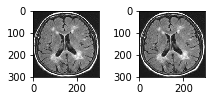

In [9]:
def main():
    init_dataset=loadimages(filelist)
    plotting(init_dataset[8])
    resize_data=resizingimages(init_dataset)
    #print(resize_data[4].shape)
    dataset2d=convert2dGreyScale(resize_data)
    print(dataset2d[4].shape)
    #gray_image = rgb2gray(resize_data[4])
    #print(gray_image.shape)
    augmenteddataset=augmentdataset(dataset2d)
    print(len(augmenteddataset))
    from skimage import data, exposure, img_as_float
    
    #plotting(image)
    #from numpy import fliplr, flipud
    #p_flip = fliplr(augmenteddataset[1])
    #u_flip = flipud(augmenteddataset[1])
    #plt.subplot(141), imshow(augmenteddataset[1])
    #plt.subplot(142), imshow(image)
    #plt.subplot(143), imshow(u_flip)
    #plt.show()


main()

In [3]:
def plotting(image):
    plt.imshow(image, cmap='gray')

In [4]:
def resizingimages(init_dataset):
    img_resized_dataset=[]
    for image in init_dataset:
        img=image
#img = init_dataset[4]
#resize image
        img_resized = resize(img, (300, 300))
        #print(img_resized.shape)
        img_resized_dataset.append(img_resized)
    return img_resized_dataset



#plot images
#plt.subplot(121), imshow(img)
#plt.title('Original Image')
#plt.subplot(122), imshow(img_resized)
#plt.title('Resized Image')
#plt.show()
    

In [5]:
'''def rescalingimages(resize_data):
    img_rescaled_dataset=[]
    for image in resize_data:
        img = image
        img_rescaled = rescale(img, scale=(0.5, 0.5))
        print(img_rescaled.shape)
#print(img_rescaled.ndim)
        img_rescaled_dataset.append(image)
    return img_rescaled_dataset
        
'''
#plt.subplot(121), imshow(img)
#plt.title('Original Image')

#plt.subplot(122), imshow(img_rescaled)
#plt.title('Rescaled Image')

#plt.show()

'def rescalingimages(resize_data):\n    img_rescaled_dataset=[]\n    for image in resize_data:\n        img = image\n        img_rescaled = rescale(img, scale=(0.5, 0.5))\n        print(img_rescaled.shape)\n#print(img_rescaled.ndim)\n        img_rescaled_dataset.append(image)\n    return img_rescaled_dataset\n        \n'

In [6]:
def convert2dGreyScale(resize_data):
    dataset2d=[]
    for image in resize_data:
        if image.ndim == 3:
            gray_image=rgb2gray(image)
            dataset2d.append(gray_image)
        else:
            dataset2d.append(image)
    return dataset2d
   

In [7]:
def augmentdataset(dataset2d):
    originaldataset=dataset2d
    augmentdataset=[]
    for image in dataset2d:
        ### image rotation
        random_degree = random.uniform(-25, 25)
        rotated_image = rotate(image, random_degree)
        augmentdataset.append(rotated_image)
        ## horizontal flip doesn't need skimage, it's easy as flipping the image array of pixels !
        h_flip_image = fliplr(image)
        augmentdataset.append(h_flip_image)
        ## vertical flip flipud
        v_flip_image = flipud(image)
        augmentdataset.append(v_flip_image)
    #print(len(augmentdataset))
    #print(augmentdataset[355].ndim)
    originaldataset = originaldataset + augmentdataset
    return originaldataset


    

In [ ]:
def preprocessingStage2(augmenteddataset):
    gamma_corrected_dataset=[]
    for image in augmenteddataset:
        image = img_as_float(augmenteddataset[1])
        gamma_corrected = exposure.adjust_gamma(image, 2)
        gamma_corrected_dataset.append(image)
    
    # Output is darker for gamma > 1
    #image.mean() > gamma_corrected.mean()
    